# PHYS250 assignment 4: Understanding and using Newton's Method and others for root finding


## Introduction

As we've been discussing in lectures, minimization -- thought of broadly, and perhaps more appropriately as *optimization* -- is a critical exercise in physics. 

- *Fitting a model to data:* minimize differences between a model and data
- *Second law of thermodynamics:* minimize changes in entropy for a system in thermodynamic equilibrium
- *Conservation of momentum:* establish mechanical equilibrium by minimizing changes in momentum, $\frac{d\vec{p}}{dt}=0$
- *Principle of least action:* obtain the equations of motion of a system by minimizing (or maximizing!) the variations of the action, $S$
- *Path integral formulation of quantum mechanics:* sort quantum mechanically possible trajectories by minimizing quantum action
- *Ising model:* minimization the energy of the spin configurations

One of the primary functions of minimization is to solve the equation, potentially in many dimentions $n$ and thus parameters $\{x_n\}$:

$$ F'(\{x_n\}) = 0$$

The purposes of this assignment is to gain experience with some of the standard and most effective methods for dealing with the numerical compliexities of this general task.


## Table of Contents

1. [Root finding](#rootfinding)
1. [Bisection](#bisection)
    1. [Convergence rate](#convergence)
    1. [Remarks on bisection](#bisectionremarks)
1. [Newton's Method](#newton)
    1. [Accuracy of numerical differentiation](#numericaldiff)
1. [Assignment description](#assignment)
1. Exercises:
    1. [Exercise 1: plot your functions!](#ex1)
    1. [Exercise 2: write a better bisection function](#ex2)
    1. [Exercise 3: test your functions](#ex3)
    1. [Exercise 4: compute and plot errors](#ex4)
    1. [Exercise 5: write a function that implements Newton's method](#ex5)
    1. [Exercise 6: qualitative assessment](#ex6)
    1. [Exercise 7: optional additional work](#ex7)
    1. [Exercise 8: more optional additional work](#ex7)

***

## Root finding <a class="anchor" name="rootfinding"></a>

Rootfinding is the process of solving $f(x) = 0$ for $x$.  The standard assumption is that $f : R \to R$ is _continuous_.  We are interested in developing general-purpose algorithms---those that can use $f(x)$ without needing to know many details about the function itself except that it satisfies basic generic properites of "well-behaved" functions.  When we implement our rootfinding algorithm in software, the user will pass a function or program to compute $f(x)$.  

Rootfinding methods for differentiable functions may also use the derivative $f'(x)$.

Some questions immediately arise:
* **Existence.** When does this equation have at least one solution?
* **Uniqueness.** When is the solution unique?

## Bisection <a class="anchor" name="bisection"></a>

Bisection is a rootfinding technique that starts with an interval $[a,b]$ containing a root and does not require derivatives.

As we discussed in class, the main idea behind this algorithm is to find the root of a given number $N$.

Suppose $f$ is a continuous function defined on the interval $[a,b]$, with $f(a)$ and $f(b)$ of opposite sign. We know that there exists at least one number $p$ in $(a,b)$ with $f(p)=0$. 

To find such $p$, set $a_1=a$ and $b_1=b$, and let $p_1$ be the midpoint in between a and b: 

$$p_1=\dfrac{(a_1+b_1)}{2}$$

1) If $f(p_1)=0$, then $p=p_1$, we are done;

2) If $f(p_1)$  and  $f(a_1)$ have the same sign, $p \in (p_1,b_1)$, and we set $a_2=p_1$ and $b_2=b_1$;

3) Similarly, If $f(p_1)$  and  $f(a_1)$ have opposite signs, $p \in (p_1,b_1)$, and we set $a_2=a_1$ and $b_2=p_1$;

4) Iterate the process above in the following intervals: $[a_2, b_2]$, $[a_3, b_3]$...$[a_i, b_i]$;

5) Set the error tolerance, the loop will be terminate if $$\dfrac{(a_i+b_i)}{2}< tolerance.$$


### Convergence rate <a class="anchor" name="convergence"></a>

Let's quantitatively revisit the convergence rate.  

A convergent rootfinding algorithm produces a sequence of approximations $x_i$ such that 

$$\lim_{i \to \infty} x_i \to x_*$$ 

where $f(x_*) = 0$.  

For analysis, it is convenient to define the errors $e_i = x_i - x_*$. We say that an algorithm is **$q$-linearly convergent** if 

$$\lim_{i \to \infty} |e_{i+1}| / |e_i| = \rho < 1.$$  

(The $q$ is for "quotient".)  A smaller convergence factor $\rho$ represents faster convergence.  A slightly weaker condition ($r$-linear convergence or just **linear convergence**) is that

$$ |e_i| \le \epsilon_i $$

for all sufficiently large $i$ when $\epsilon_i$ converges $q$-linearly to 0.

Which criteria does the bisection method satisfy?  What is $\rho$ for bisection?

### Remarks on bisection <a class="anchor" name="bisectionremarks"></a>

* Specifying an interval is often inconvenient
* An interval in which the function changes sign guarantees convergence (robustness)
* No derivative information is required
* Roots of even degree are problematic
* A bound on the solution error is directly available
* The convergence rate is modest -- one iteration per bit of accuracy


## Newton-Raphson Method <a class="anchor" name="newton"></a>

We discussed the more "intelligent" method of Newton in lecture. Indeed, as we discussed, much of numerical analysis here reduces to [Taylor series](https://en.wikipedia.org/wiki/Taylor_series), the approximation

$$ f(x) = f(x_0) + f'(x_0) (x-x_0) + f''(x_0) (x - x_0)^2 / 2 + \dotsb $$

centered on some reference point $x_0$.
In numerical computation, it is exceedingly rare to look beyond the first-order approximation

$$ \tilde f_{x_0}(x) = f(x_0) + f'(x_0)(x - x_0) . $$

Since $\tilde f_{x_0}(x)$ is a linear function, we can explicitly compute the unique solution of $\tilde f_{x_0}(x) = 0$ as

$$ x = x_0 - f(x_0) / f'(x_0) . $$

This is Newton's Method (aka Newton-Raphson or Newton-Raphson-Simpson) for finding the roots of differentiable functions (or twice differentiable functions in the case that $f(x) = g'(x)$ for an optimization problem).

### Accuracy of numerical differentiation <a class="anchor" name="numericaldiff"></a>

In the exercises below, you will have to perform numerical differentiation for Newton's method. Here is some discussion on that point.

#### Taylor expansion

Classical accuracy analysis assumes that functions are sufficiently smooth, meaning that derivatives exist and Taylor expansions are valid within a neighborhood.  In particular,

$$ f(x+h) = f(x) + f'(x) h + f''(x) \frac{h^2}{2!} + \underbrace{f'''(x) \frac{h^3}{3!} + \dotsb}_{O(h^3)} . $$

The big-$O$ notation is meant in the limit $h\to 0$.  Specifically, a function $g(h) \in O(h^p)$ (sometimes written $g(h) = O(h^p)$) when

there exists a constant $C$ such that

$$ g(h) \le C h^p $$

for all sufficiently *small* $h$.

**Note:** When analyzing algorithms, we will refer to cost being $O(n^2)$, for example, where $n\to \infty$.
In this case, the above definition applies for sufficiently *large* $n$.  Whether the limit is small ($h\to 0$) or large ($n \to\infty$) should be clear from context.

#### Discretization error
The `diff` and `diff_wp` functions use a "forward difference" formula: $\tilde f'(x) := (f(x+h) - f(x))/h$.
Using the Taylor expansion of $f(x+h)$, we compute the discretization error

$$ \begin{split} \frac{f(x+h) - f(x)}{h} - f'(x) &= \frac{f(x) + f'(x) h + f''(x) h^2/2 + O(h^3) - f(x)}{h} - f'(x) \\
&= \frac{f'(x) h + f''(x) h^2/2 + O(h^3)}{h} - f'(x) \\
&= f''(x) h/2 + O(h^2) .
\end{split} $$

This is the *discretization error* caused by choosing a finite (not infinitesimal) differencing parameter $h$, and the leading order term depends linearly on $h$.

#### Rounding error
We have an additional source of error, *rounding error*, which comes from not being able to compute $f(x)$ or $f(x+h)$ exactly, nor subtract them exactly.  Suppose that we can, however, compute these functions with a relative error on the order of $\epsilon_{\text{machine}}$.  This leads to

$$ \begin{split}
\tilde f(x) &= f(x)(1 + \epsilon_1) \\
\tilde f(x \oplus h) &= \tilde f((x+h)(1 + \epsilon_2)) \\
&= f((x + h)(1 + \epsilon_2))(1 + \epsilon_3) \\
&= [f(x+h) + f'(x+h)(x+h)\epsilon_2 + O(\epsilon_2^2)](1 + \epsilon_3) \\
&= f(x+h)(1 + \epsilon_3) + f'(x+h)x\epsilon_2 + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h)
\end{split}
$$

where each $\epsilon_i$ is an independent relative error on the order of $\epsilon_{\text{machine}}$ and we have used a Taylor expansion at $x+h$ to approximate $f(x \oplus h)$.
We thus write the rounding error in the forward difference approximation as

$$ \begin{split}
\left\lvert \frac{\tilde f(x+h) \ominus \tilde f(x)}{h} - \frac{f(x+h) - f(x)}{h} \right\rvert &=
  \left\lvert \frac{f(x+h)(1 + \epsilon_3) + f'(x+h)x\epsilon_2 + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h) - f(x)(1 + \epsilon_1) - f(x+h) + f(x)}{h} \right\rvert \\
  &\le \frac{|f(x+h)\epsilon_3| + |f'(x+h)x\epsilon_2| + |f(x)\epsilon_1| + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}}h)}{h} \\
  &\le \frac{(2 \max_{[x,x+h]} |f| + \max_{[x,x+h]} |f' x| \epsilon_{\text{machine}} + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h)}{h} \\
  &= (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h} + O(\epsilon_{\text{machine}}) \\
\end{split} $$

where we have assumed that $h \ge \epsilon_{\text{machine}}$.

This error becomes large (relative to $f'$ -- we are concerned with relative error after all)
* $f$ is large compared to $f'$
* $x$ is large
* $h$ is too small

#### Total error and optimal $h$

Suppose we would like to choose $h$ to minimize the combined discretization and rounding error,

$$ h^* = \arg\min_h | f''(x) h/2 | + (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h} $$

(dropping the higher order terms), which we can compute by differentiating with respect to $h$ and setting the result equal to zero

$$ |f''|/2 - (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h^2} = 0 $$

which can be rearranged as

$$ h^* = \sqrt{\frac{4\max|f| + 2\max|f'x|}{|f''|}} \sqrt{\epsilon_{\text{machine}}} .$$

Of course this formula is of little use for computing $h$ because all this is to compute $f'$, which we obviously don't know yet, much less $f''$.

However, it does have value:
* It explains why `1e-8` (i.e., $\sqrt{\epsilon_{\text{machine}}}$) is empirically found to be about optimal for well-behaved/scaled functions.
* It explains why even for the best behaved functions, our best attainable accuracy with forward differencing is $\sqrt{\epsilon_{\text{machine}}}$.
* If we have some special knowledge about the class of functions we need to differentiate, we might have bounds on these quantities and thus an ability to use this formula to improve accuracy.  Alternatively, we could run a parameter sweep to empirically choose a suitable $h$, though we would have to re-tune in response to parameter changes in the class of functions.
* If someone claims to have a simple and robust rule for computing $h$ then this formula tells us how to build a function that breaks their rule.  There are no silver bullets.
* If our numerical differentiation routine produces a poor approximation for some function that we run into in the wild, this helps us explain what happened and how to fix it.


## Assignment description <a class="anchor" name="assignment"></a>

In this assignment,  you will consider aspects of the numerical methods that we've discussed and apply slight variations and improvements on those as you work through the details of the exercises and learn the limitations that the methods have.


### Exercise 1: plot your functions! <a class="anchor" name="ex1"></a>

First, let's consider some test functions, defined here along with their derivatives which we'll use later. It is often crucial to try to *plot* functions and data (when you can). 


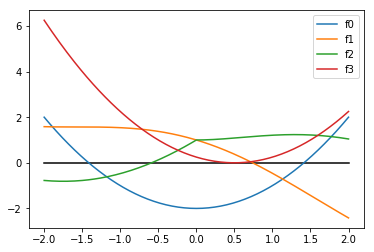

In [307]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Define a set of functions

def f0(x):
    return x*x - 2, 2*x

def f1(x):
    return np.cos(x) - x, -np.sin(x) - 1

def f2(x):
    # Note that this is a piecewise function, effectively
    return np.exp(-np.abs(x)) + np.sin(x), np.exp(-np.abs(x))*(-np.sign(x)) + np.cos(x)

def f3(x):
    return x*x - x + 0.25, 2*x - 1

# Make a list of these functions so that
# it is easy to iterate over

tests = [f0, f1, f2, f3]

# Define a range over which to plot these functions
x = np.linspace(-2,2,201)
plt.plot(x, 0*x, color='k')

# Iterate over the functions defined above
for f in tests:
    plt.plot(x, f(x)[0], label=f.__name__)
plt.legend(loc='upper right');

Questions for Exercise 1:

1. Which of these functions have at least one root?
1. Which have more than one root?
1. Can we determine these properties merely by evaluating $f(x)$ for some values of $x$?
1. Define a function that has more than two roots in the specified range

#### 1. It is obvious by eye. Mathematically,we can check by the sign of the product between the minimum and maximum of the function in the given range.

In [13]:
for f in tests:
    ymin, ymax = np.min(f(x)[0]), np.max(f(x)[0])
    root_bool = (ymin*ymax <= 0)
    if root_bool:
        print (f.__name__ + ' has at least one root in a given range')
    else:
        print (f.__name__ + ' has no root in a given range')

f0 has at least one root in a given range
f1 has at least one root in a given range
f2 has at least one root in a given range
f3 has at least one root in a given range


#### 2. Which have more than one root?
Approach: Let me denote $x=[x_1, x_2, ..., x_n]$. Compute the product $f(x_i)f(x_{i+1}$), and find its sign. If the sign were negative, it means there is a root between $x_i$ and $x_{i+1}$. Do this for all $i$, and count the number of times when the product is negative. 
<br>
__you may miss a root unless $\Delta x$ is sufficiently small__.

In [490]:
def countRoots(func, x, n=1000):
    ''' Counts the number of roots of a function in a range [x0, x1)
    '''
    y = np.asarray(func(x))
    return np.sum(y[0][0:-2] * y[0][1:-1] < 0) + np.sum(y[0] == 0)

for f in tests:
    nRoots = countRoots(f, x)
    print (f.__name__ + ' has %d roots' % nRoots)

0.0
f0 has 2 roots
f1 has 1 roots
f2 has 1 roots
f3 has 1 roots
f4 has 3 roots


##### 3. Can we determine these properties merely by evaluating  f(x)  for some values of  x ?
Yes. Shown above.

##### 4. Define a function that has more than two roots in the specified range

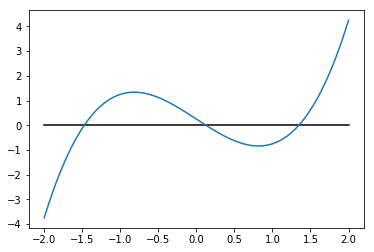

In [18]:
def f4(x):
    return x**3 - 2 * x + 0.25, 3*x**2-2
plt.plot(x, 0*x, color='k')
plt.plot(x, f4(x)[0])
plt.show()

# Add my function to tests
if not f4 in tests:
    tests.append(f4)

### Exercise 2: write a better bisection function <a class="anchor" name="ex2"></a>


1. Write a `hasroot` function to determine if a user-defined function has a root in the specified interval
1. Write a new `bisection` function that overcomes these issues by
   1. Take a user defined function as an argument
   1. Provide an array as an input that can hold the iterations of the methods
   1. Perform a truly *iterative* method by calling *itself* in the case that additional iterations are required

<font color='red'>Comments on clarity and speed in coding
</font> 
<br>
Thanksfully, David already wrote down the functions that do this but I'd like to use a slightly modified version of it. Here is why. <br>
<br>
This function is not actually pretty from the CS perspective because you MUST give a null list to the keyword argument history *initially*. If you do not do it, it raises an error. We basically lost the advantage of keyword arguments. 
<br><br>
I provide a slighly modified version of it. It is much more robust than the original code. The cost I paid is **speed** because I had to make a new list object `hist`. <br>
At this level, I encourage everyone to develop clarity of codes rather than speed. Trust me. If you couldn't understand your own codes from an year ago, that would hurt your work. If you are collaborating with someone, __clarity should come first.__

In [337]:
def hasroot(f, a, b):
    return f(a)[0]*f(b)[0] < 0 # Note this is apploes to a range (a, b) not [a, b].

def bisect(f, a, b, history=[], tol=1e-5):
    mid = (a + b)/2.

    hist = history[:] # make a new list object
    hist.append(mid)

    # if |f(mid)| < tol, terminate self-iteration
    if np.abs(f(mid)[0]) < tol:
        return mid, np.asarray(history)
    else: # otherwise, self-iterate
        if hasroot(f, a, mid):
            return bisect(f, a, mid, history=hist, tol=tol) 
        else:
            return bisect(f, mid, b, history=hist, tol=tol)

In [289]:
x, h = bisect(tests[0], 0, 2, tol=1e-8)
h.tolist()

[1.0,
 1.5,
 1.25,
 1.375,
 1.4375,
 1.40625,
 1.421875,
 1.4140625,
 1.41796875,
 1.416015625,
 1.4150390625,
 1.41455078125,
 1.414306640625,
 1.4141845703125,
 1.41424560546875,
 1.414215087890625,
 1.4141998291015625,
 1.4142074584960938,
 1.4142112731933594,
 1.4142131805419922,
 1.4142141342163086,
 1.4142136573791504,
 1.4142134189605713,
 1.4142135381698608,
 1.4142135977745056,
 1.4142135679721832,
 1.414213553071022]

1.414215087890625


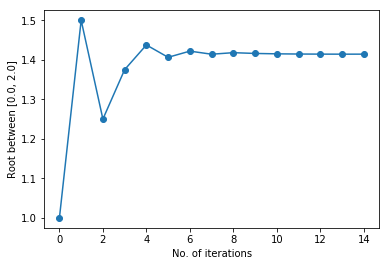

In [294]:
iter_arr = range(1, 11)
# iter_arr = [1, 5, 20, 10]
a, b = 0., 2.
roots, history = bisect(tests[0], 0, 2, tol=1e-5)
print (roots)
plt.plot(history, '-o')
plt.xlabel('No. of iterations')
plt.ylabel('Root between [%.1f, %.1f]' % (a, b))
plt.show()

### Exercise 3: perform tests of your bisection function <a class="anchor" name="ex3"></a>

1. What is the accuracy of the `bisection` function for various user-defined input functions
1. How many iterations are required for various functions?

Since some test functions were transcendental, it is more pedagogical to use functions with known roots. Let's define them. We will use roots between 0 and 2 for this exercise.

In [374]:
def g0(x):
    return np.cos(x), -np.sin(x)
def g1(x):
    return np.log(x+0.5), 1/x
def g2(x):
    return x*x - 2, 2*x
tests2 = [g0, g1, g2]
roots_true = [np.pi/2., 0.5, np.sqrt(2)]
fun_names = [r'$\cos (x)$', r'$\ln{(x)}$', r'$x^2-2$']

In [436]:
a, b = 0.1, 2
tol = 1e-8

def plot_err(a, b, tol):
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))
    nx = 0
    for i, (g, root_true, title) in enumerate(zip(tests2, roots_true, fun_names)):
        err = root_true - bisect(g, a, b, tol=tol)[1]
        axes[i, 0].plot(err, '-o')
        axes[i, 0].set_xlabel('No. of iterations')
        axes[i, 0].set_ylabel('Error')
        axes[i, 0].set_title(title + ',  # of required iterations: %d' % len(err))
        axes[i, 1].semilogy(np.abs(err), '-o')
        axes[i, 1].set_xlabel('No. of iterations')
        axes[i, 1].set_ylabel('|Error|')
        axes[i, 1].set_title(title + ',  # of required iterations: %d' % len(err))
        
        axes[i, 1].set_ylim(tol, 1)
        if nx < len(err):
            nx = len(err)
    for j, ax in enumerate(axes.flatten()):
        ax.set_xlim(-0.5, nx*1.1)
        if j % 2 == 1:
            x = np.linspace(0.1, nx, 10)
            y = 0.5**x
            ax.plot(x, y, '--', label=r'$0.5^x$')
            ax.legend()
    
    
    fig.suptitle('$a=%.1f$, $b=%.1f$' % (a, b))
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

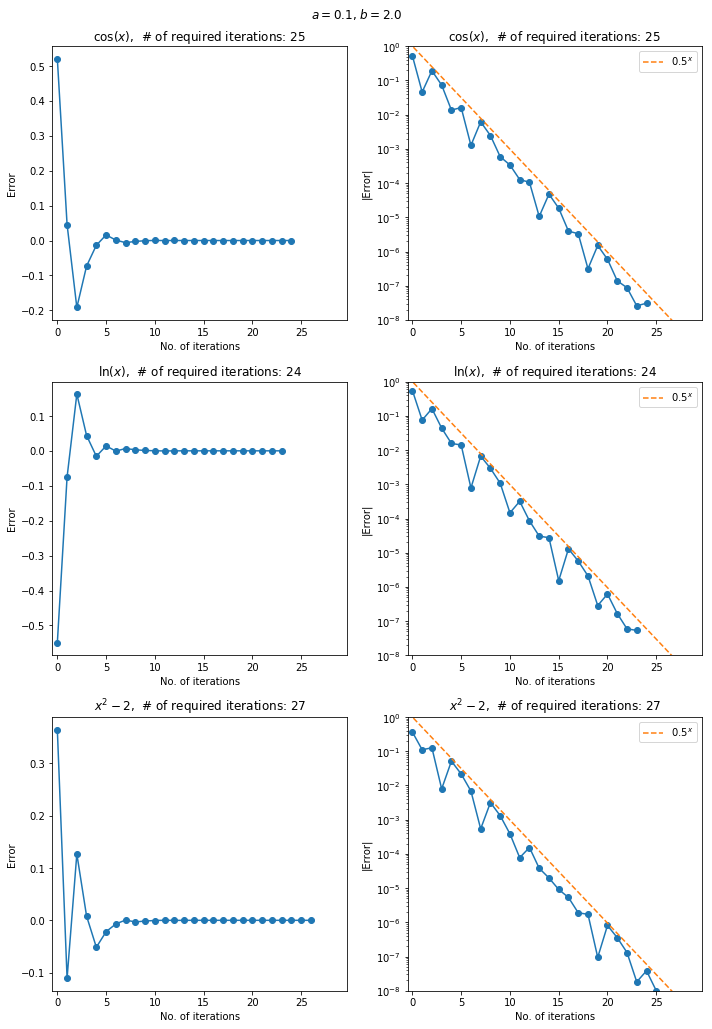

In [437]:
a, b = 0.1, 2
tol = 1e-8
plot_err(a, b, tol)

Notice that the rate of convergence is similar. The required number of iterations really depend on the quality of initial guess. i.e. a and b

### Exercise 4: compute and plot errors <a class="anchor" name="ex4"></a>

In this exercise, you should graphically represent the error between your approximation and the "true" answer.

Questions for exercise 4:

1. Compute errors for each of your functions as a function of the iteration number
1. Plot the errors as a function of that iteration number
<br>
...Notice that there is a lower bound for the error around 1e-16. We hit the numerical precision for numpy.float64

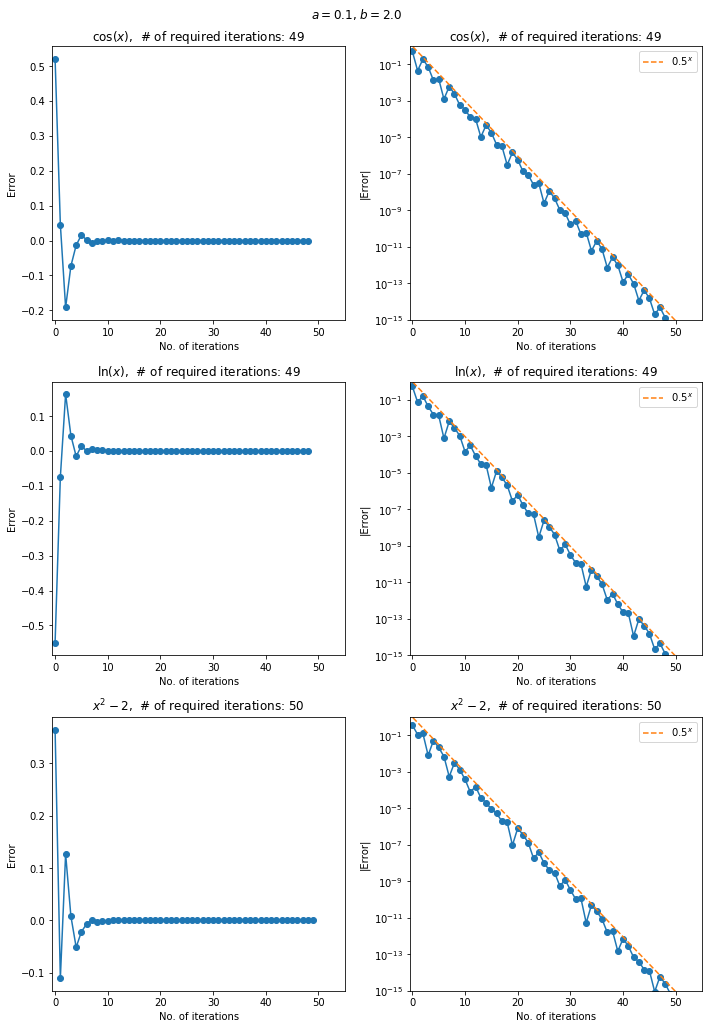

In [438]:
import sys
sys.setrecursionlimit(1500)

a, b = 0.1, 2
tol = 1e-15
plot_err(a, b, tol)

### Exercise 5: write a function that implements Newton's method <a class="anchor" name="ex5"></a>

We discussed an example in lecture (in the Examples folder in GitHub: https://github.com/UChicagoPhysics/PHYS250/tree/master/Examples).

However, this function had a few shortcomings that you should now fix.

Questions for exercise 5:

1. Instead of using a built-in library for computing the derivative of the function `f(x)`, `f'(x)`, I want you to compute it yourself.
1. Place a tolerance on the computation of the derivative of this function in addition to the convergence of the method itself.
1. Protect against division by zero


In [492]:
def derivative(f, x, tol):
    y = f(x)[0]
    dy = np.roll(y, -1) - y
    dx = np.roll(x, -1) - x
    dydx = dy / dx
    dydx[-1] = 0 # last component is meaningless
    dydx[np.abs(dydx) < dydx] = 0 # if dfdx is sufficiently small, replace it with zero
    return dydx

def find_nearest(array, value):
    ''' Find the nearest value in a numpy array'''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

def newton_step(f, a, b, xi, tol_dfdx=1e-3):
    x = np.linspace(a, b, 1000)
    dfdx_arr = derivative(f, x, tol_dfdx)

    __, ind = find_nearest(x, xi)
    dfdx = dfdx_arr[ind]
    
    try: xi -= f(x[ind])[0] / dfdx
    except ZeroDivisionError:
        print ('ZeroDivisionError')
        return xi
    return xi
    
def newton(f, a, b, x0, tol=1e-5, tol_dfdx=1e-3, max_it=1000):
    '''
    Find a root between [a, b] by the Newton's method. 
    xi is the starting point.
    '''
    x = np.linspace(a, b, 10000)
    dfdx_arr = derivative(f, x, tol_dfdx)
    
    xi = x0
    dfdx = 1 # dummy
    counter = 0
    while dfdx > tol_dfdx and counter < max_it:
        counter += 1
        xi = newton_step(f, a,b, xi, tol_dfdx) 
        # if converged, get out of the loop
        if np.abs(xi) < tol:
            break
    return xi

tests3 = [f0, f1, f4]
for f in tests3:
    xi = newton(f, 0, 2, 1.5)
    print ('Root of %s between [%.1f, %.1f]: %.3f' % (f.__name__, 0, b, xi))


xi = newton(f4, 0, 2, 1.5)
print ('Root of %s between [%.1f, %.1f] with xi=1.5: %.3f' % (f4.__name__, 0, b, xi))
xi = newton(f4, 0, 2, 0)
print ('Root of %s between [%.1f, %.1f] with xi=0: %.3f' % (f4.__name__, 0, b, xi))
    

Root of f0 between [0.0, 2.0]: 1.414
Root of f1 between [0.0, 2.0]: 0.739
Root of f4 between [0.0, 2.0]: 1.347
Root of f4 between [0.0, 2.0] with xi=1.5: 1.347
Root of f4 between [0.0, 2.0] with xi=0: 0.125


f4 has two roots between -2 and 2. Depending on your starting point `xi`, it reaches to a different root. <br>
f0 also has two roots. $x=\pm \sqrt2$. Check below

In [478]:
a,b = -2, 2
xi = newton(f0, a, b, -1, tol_dfdx=1e-5, tol=1e-5, max_it=1000)
print ('Root of %s between [%.1f, %.1f] with xi=-1: %.3f' % (f0.__name__, a, b, xi))
xi = newton(f0, a, b, 1, tol_dfdx=1e-5, tol=1e-5, max_it=1000)
print ('Root of %s between [%.1f, %.1f] with xi=+1: %.3f' % (f0.__name__, a, b, xi))


Root of f0 between [-2.0, 2.0] with xi=-1: -1.415
Root of f0 between [-2.0, 2.0] with xi=+1: 1.413


#### Could we solve for roots using the Newton's method?
<br>
You may apply the Newton's method to $(a_i, a_i + \delta)$, and repeat for $(a_{i+1}, a_{i+1} + \delta)$ to find all roots. Let's try.

/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in cos
  # This is added back by InteractiveShellApp.init_path()
/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sin
  # This is added back by InteractiveShellApp.init_path()
/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app
/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app
/Users/Takumi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd

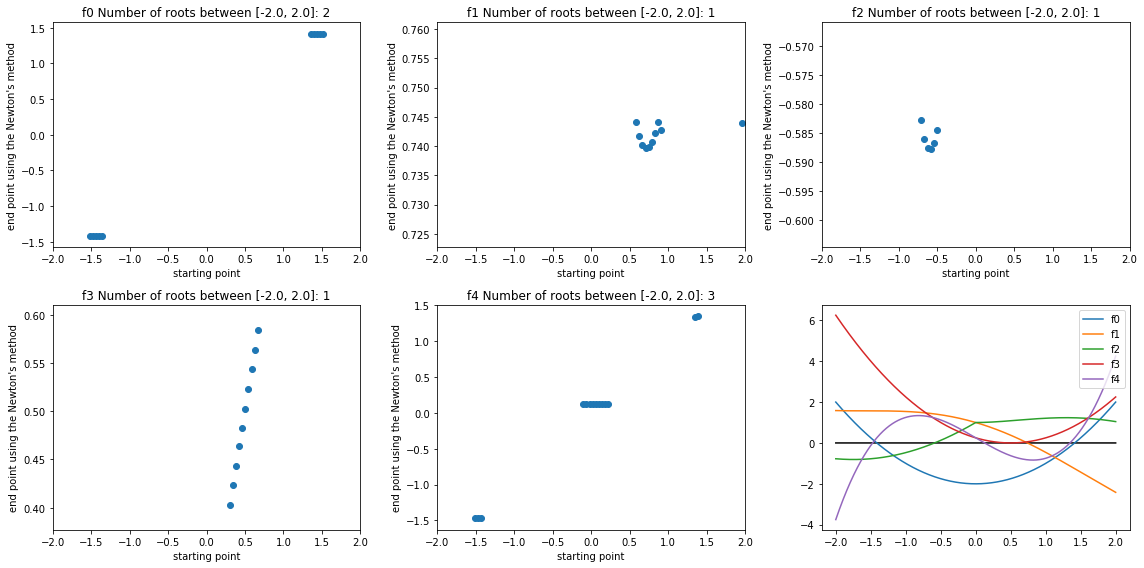

In [501]:
#### Use the Newton's method to get all roots!
a, b = -2., 2.
tor_newton = 1e5
tor = 1e-2
x0s = np.linspace(a, b, 100)

fig, axes = plt.subplots(2,3,figsize=(16,8))
for f, ax in zip(tests, axes.flatten()):
    candids = []
    nroots = countRoots(f, np.linspace(a, b, 2001))
    for i in range(len(x0s)):
        candid = newton(f, a, b, x0s[i], tol=tol_newton, max_it=10000)
        
        # this candidate value may have not converged.
        # Check if the value is actually a root
        if np.abs(f(candid)[0]) > tor:
            candid = np.nan
        candids.append(candid)

    ax.scatter(x0s, candids)
    ax.set_title(f.__name__ + ' Number of roots between [%.1f, %.1f]: %d' %(a,b, nroots))
    ax.set_xlabel('starting point')
    ax.set_ylabel('end point using the Newton\'s method')
    ax.set_xlim(a, b)
fig.tight_layout()

axes.flatten()[5].plot(x, 0*x, color='k')
for f in tests:
    axes.flatten()[5].plot(x, f(x)[0], label=f.__name__)
axes.flatten()[5].legend(loc=1)

Observe that it is necessary to have the starting points sufficiently close to the roots for convergence. As you may see from f1-f3, The Newton's method does not guarantee convergence. It may oscillate around the actual root. The oscillation amplitude goes like $1/f'(x)$. For this reason, the algorithm fails to converge for f3.   

### Exercise 6: qualitative assessment  <a class="anchor" name="ex6"></a>

Questions for exercise 6:

* Did we solve all of these equations?<br>
... Not quite. Qualitatively, we can repeat this root finding algorithm for different regions[a, b], and scan the region of interest. This way, we can solve most equations but not all. <br>
One must be careful that there is only one root in [a, b]. The bisection algorithm allows you to find roots but is slow. The Newton's method is faster, but it may not converge. 
<br>
* Iterations break down if ...<br> 
    1. your intial guess is not sufficiently close enough to the endpoint.
    2. $f'(x_i) = 0$ for $x_i \in (a, b)$.
<br><br>
* Does choosing a different initial guess lead to different solutions? <br>
... YES. Shown above.<br><br>
* How is this convergence test different from the one we used for bisection?<br>
... In the Newton's method, we introduced two kinds of tolerance. One is about the step of the Newton's method. This makes sure that the step won't be too large due to the small $f'(x_i)$. The another one is the tolerance on the found root. $\epsilon$ in David's lecture notes. The bisection uses just the latter tolerance.<br><br>
* Is the convergence rate similar for all test equations? <br>
The convergence rate is not the same for all test functions unlike the bisection algorithm. 
The Newton's method is often faster, but you need to start a good starting point to see convergence. The Newton's method could also fail when $x_i$ becomes locked in a infinite (or semi-inifinite) loops. <br>
Further reading: https://www.saylor.org/site/wp-content/uploads/2011/11/3-8NewtonsMethod1.pdf

<br><br>
Observe that the convergence rate may vary depending on the functions and initial guess.

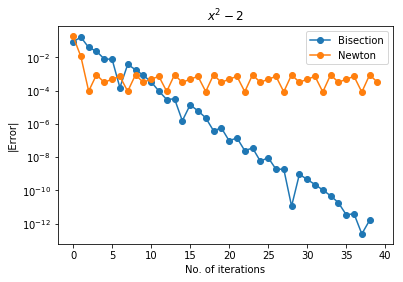

In [540]:
# Convergence rate
def newton2(f, a, b, x0, tol=1e-5, tol_dfdx=1e-3, max_it=100):
    '''
    Returns result for each iteration in a list
    x0 is the starting point.
    '''
    x = np.linspace(a, b, 1000)
    dfdx_arr = derivative(f, x, tol_dfdx)
    
    xis = []
    xi = x0
    xis.append(x0)
    dfdx = 1 # dummy
    counter = 0
    for i in range(1, max_it):
        if dfdx > tol_dfdx:
            counter += 1
            xi = newton_step(f, a,b, xi, tol_dfdx=tol_dfdx)
            xis.append(xi)
        else:
            xis.append(np.nan)
    return np.asarray(xis)

def compare_err(root, f, a, b, tol, xi, tol_dfdx=1e-5, max_it=40):
    _, x_bisect = bisect(f, a, b, tol=tol)
    x_newton = newton2(f, a, b, xi, tol=tol, tol_dfdx=tol_dfdx, max_it=max_it)
    err_b = x_bisect - root
    err_n = x_newton - root
    fig, ax = plt.subplots()
    ax.semilogy(np.abs(err_b), 'o-', label='Bisection')
    ax.semilogy(np.abs(err_n), 'o-', label='Newton')
    plt.legend()
    plt.xlabel('No. of iterations')
    plt.ylabel('|Error|')
    
    
    
# Bisection
iter_arr=np.arange(1, 40)
err_b = np.sqrt(2) - bisection(tests[0], 0, 2, iter_arr=iter_arr)[0]
plt.semilogy(np.abs(err_b), 'o-', label='Bisection')
# Newton
xis = newton2(tests[0], 0, 2, 1.6, tol_dfdx=1e-5, max_it=40)
err_n = np.sqrt(2) - xis
plt.semilogy(np.abs(err_n), 'o-', label='Newton')
plt.legend()
plt.title(r'$x^2-2$')
plt.xlabel('No. of iterations')
plt.ylabel('|Error|')
plt.show()

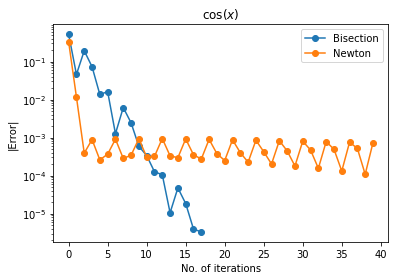

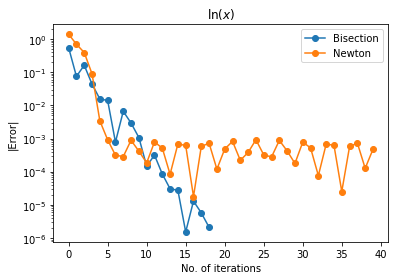

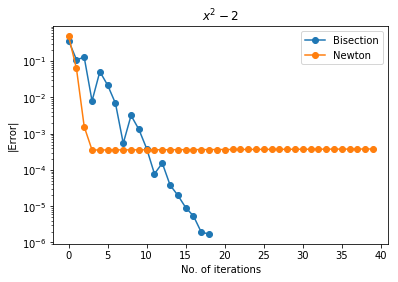

In [538]:
#
a, b = 0.1, 2
tests2 = [g0, g1, g2]
roots_true = [np.pi/2., 0.5, np.sqrt(2)]
fun_names = [r'$\cos (x)$', r'$\ln{(x)}$', r'$x^2-2$']
xi = 1.9  # initial guess for Newton's method
tol=1e-6
tol_dfdx=1e-8
for i, (g, root_true, title) in enumerate(zip(tests2, roots_true, fun_names)):
    compare_err(root_true, g, a, b, tol, xi, tol_dfdx=tol_dfdx, max_it=40)
    plt.title(title)
plt.show()

### Exercise 7: optional additional work   <a class="anchor" name="ex7"></a>

As you did for the last exercise, you often want to apply Newton's method to a function that we know how to evaluate, but don't have code to differentiate. This is because it's frequently difficult/error-prone to write or because the interface by which we call it does not support derivatives.  (Commercial packages often fall in this category.)

Expand upong your default implementation of a numerical derivative above by using the Walker and Pernice (1998) choice of step:

* "NITSOL: A Newton iterative solver for nonlinear systems:" https://www.osti.gov/biblio/433349

This algorithm is imperfect, leaving some scaling responsibility to the user. It is the default in PETSc's "matrix-free" Newton-type solvers.

### Exercise 8: more optional additional work   <a class="anchor" name="ex8"></a>

Expand beyond 1 dimension!